# Random Forest Project

Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016). This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
loans.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


** Check out the info(), head(), and describe() methods on loans.**

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [6]:
X = loans.iloc[:, 2:]
y = loans.iloc[:, 0]

In [7]:
loans[loans['credit.policy'] == 0].count() # unbalanced problem

credit.policy        1868
purpose              1868
int.rate             1868
installment          1868
log.annual.inc       1868
dti                  1868
fico                 1868
days.with.cr.line    1868
revol.bal            1868
revol.util           1868
inq.last.6mths       1868
delinq.2yrs          1868
pub.rec              1868
not.fully.paid       1868
dtype: int64

# Exploratory Data Analysis

Text(0.5,0,'FICO')

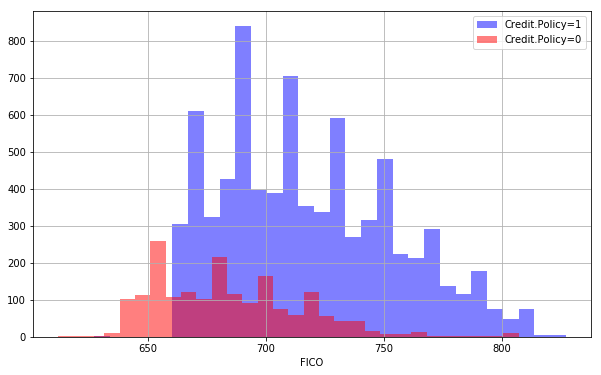

In [8]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

** Create a similar figure, except this time select by the not.fully.paid column.**

Text(0.5,0,'FICO')

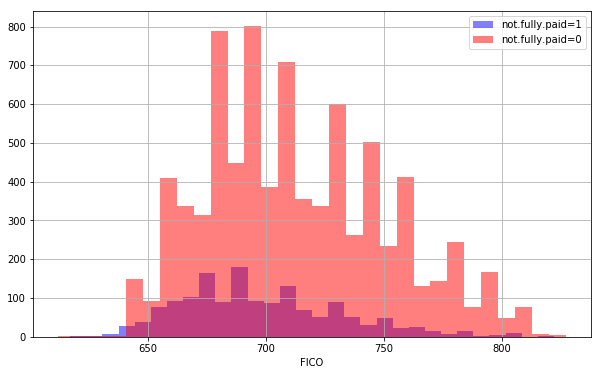

In [9]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

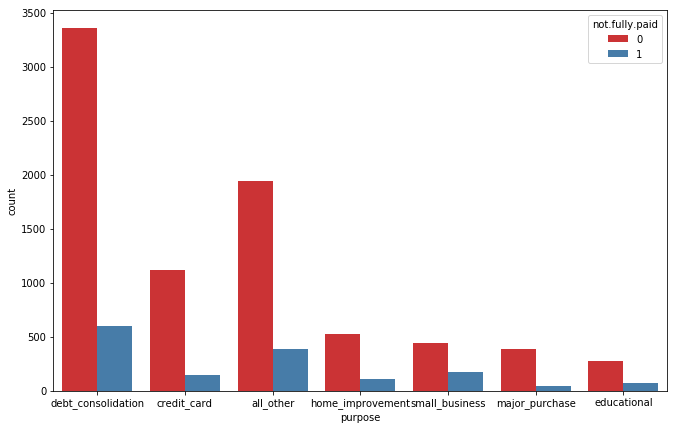

In [10]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

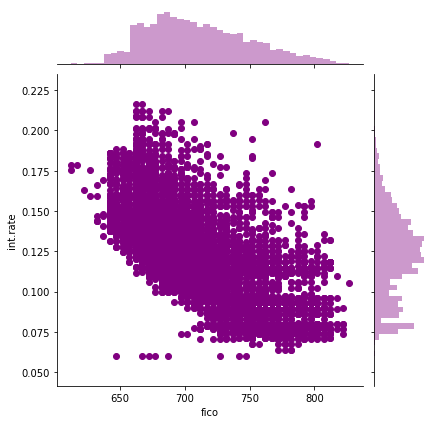

In [11]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

<Figure size 792x504 with 0 Axes>

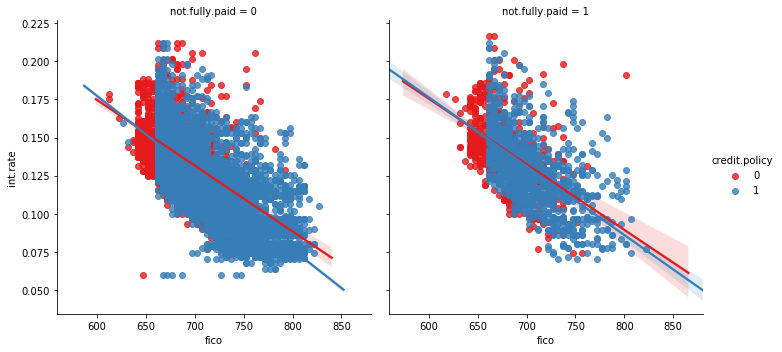

In [12]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [13]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Feature ranking:
1. feature 8 (0.346605)
2. feature 4 (0.188869)
3. feature 6 (0.085108)
4. feature 5 (0.079348)
5. feature 0 (0.074162)
6. feature 3 (0.063206)
7. feature 7 (0.042434)
8. feature 2 (0.041619)
9. feature 1 (0.040467)
10. feature 11 (0.017384)
11. feature 9 (0.013947)
12. feature 10 (0.006852)


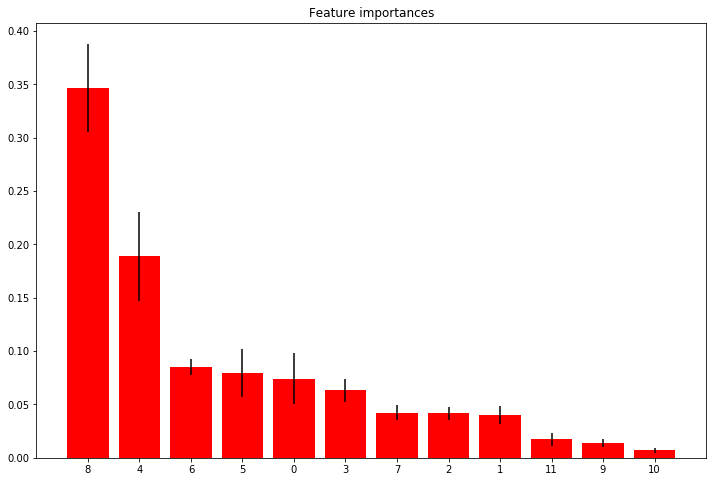

In [14]:
# Build a forest and compute the feature importances

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
forest = ExtraTreesClassifier(n_estimators=100,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])

plt.show()

In [15]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [16]:
X.columns

Index(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
       'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [17]:
X.drop(['delinq.2yrs', 'pub.rec', 'not.fully.paid'],axis=1,inplace=True)

In [18]:
X.columns

Index(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths'],
      dtype='object')

In [19]:
import warnings
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Fitting Logistic Regression to the Training set

from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(penalty='l2',solver='sag',class_weight='balanced',n_jobs=-1)
lr_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr_classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 157  412]
 [ 355 1950]]
             precision    recall  f1-score   support

          0       0.31      0.28      0.29       569
          1       0.83      0.85      0.84      2305

avg / total       0.72      0.73      0.73      2874



c:\users\abhishek .desktop-aklkmr5\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [20]:
# use SMOTE to remove class imbalance 

from collections import Counter
from imblearn.over_sampling import SMOTE 

print('Original dataset shape {}'.format(Counter(y)))

sm = SMOTE()
X, y = sm.fit_sample(X, y)

print('Resampled dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({1: 7710, 0: 1868})
Resampled dataset shape Counter({1: 7710, 0: 7710})


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [22]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train,y_train)

pred = decision_tree_classifier.predict(X_test)
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.99      0.98      0.99      2290
          1       0.98      0.99      0.99      2336

avg / total       0.99      0.99      0.99      4626



In [23]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [4, 5, 6, 7, 8, 9, 10],
                  'max_features': [2, 3, 4, 5],
                   'min_samples_split':[2, 3, 4, 5]}


grid_search = GridSearchCV(decision_tree_classifier, param_grid = parameter_grid,
                          cv = 10)

grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))


Best Score: 0.9735037984065221
Best params: {'max_depth': 10, 'max_features': 5, 'min_samples_split': 5}


In [24]:
decision_tree_classifier = DecisionTreeClassifier(max_depth= 10, max_features = 5, min_samples_split= 5)
decision_tree_classifier.fit(X_train,y_train)
pred = decision_tree_classifier.predict(X_test)
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.99      0.93      0.96      2290
          1       0.94      0.99      0.97      2336

avg / total       0.97      0.96      0.96      4626



In [25]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

predictions = rfc.predict(X_test)

print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99      2290
          1       0.98      1.00      0.99      2336

avg / total       0.99      0.99      0.99      4626



In [26]:
# Fitting XGBoost to the Training set

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
xgb_classifier = XGBClassifier(max_depth=10, n_estimators=100,n_jobs=-1)
xgb_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_xgb = xgb_classifier.predict(X_test)

# Making the Confusion Matrix
print(confusion_matrix(y_test, y_pred_xgb))
print()
print(classification_report(y_test, y_pred_xgb))

[[2268   22]
 [   5 2331]]

             precision    recall  f1-score   support

          0       1.00      0.99      0.99      2290
          1       0.99      1.00      0.99      2336

avg / total       0.99      0.99      0.99      4626



In [27]:
# Applying k-Fold Cross Validation

accuracies_xgb = cross_val_score(estimator = xgb_classifier, X = X_train, y = y_train, cv = 5)
print(accuracies_xgb.mean())
print(accuracies_xgb.std())

0.9921253403538263
0.0014044625561814566
